In [2]:
import pandas as pd

# Data

In [3]:
data = pd.read_csv('/content/Mall_Customers.csv')

In [4]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
data.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [6]:
data.shape

(200, 5)

In [7]:
print("Number of rows:",data.shape[0])
print("Number of colomns:",data.shape[1])

Number of rows: 200
Number of colomns: 5


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [9]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [10]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [11]:
data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [12]:
X = data[['Annual Income (k$)', 'Spending Score (1-100)', 'Age']]

In [13]:
X

,Annual Income (k$),Spending Score (1-100),Age
0,15,39,19
1,15,81,21
2,16,6,20
3,16,77,23
4,17,40,31
...,...,...,...
195,120,79,35
196,126,28,45
197,126,74,32
198,137,18,32


#K-MEANS

In [32]:
from sklearn.cluster import KMeans

In [33]:
k_means = KMeans()
k_means.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans()

In [34]:
k_means = KMeans()
k_means.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([6, 4, 6, 4, 6, 4, 6, 4, 6, 4, 6, 4, 6, 4, 6, 4, 6, 4, 6, 4, 6, 4,
       6, 4, 6, 4, 6, 1, 6, 4, 6, 4, 6, 4, 6, 4, 6, 4, 6, 4, 1, 4, 1, 1,
       6, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 2, 3, 0, 3, 2, 3, 2, 3,
       0, 3, 2, 3, 2, 3, 2, 3, 2, 3, 0, 3, 2, 3, 0, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 7, 3, 7, 3, 7, 3, 7, 5, 7, 5, 7, 5, 7, 5, 7, 5, 7, 5,
       7, 5], dtype=int32)

## Elbow method to find optimal number of cluters.
  

In [35]:
wcss=[]
for i in range(1, 11):
  k_means = KMeans(n_clusters=i)
  k_means.fit(X)
  wcss.append(k_means.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [36]:
wcss

[269981.28,
 181363.59595959593,
 106348.37306211122,
 73679.78903948836,
 44448.4554479337,
 37233.814510710006,
 31280.903845940935,
 25043.89004329005,
 21829.13563877983,
 19634.554629349976]

In [37]:
import matplotlib.pyplot as plt

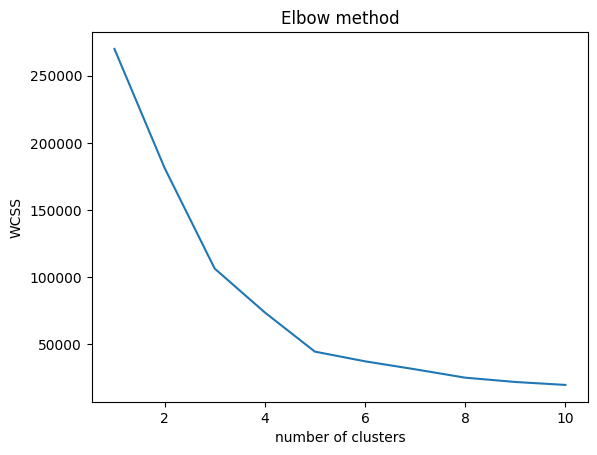

In [38]:
plt.plot(range(1, 11), wcss)
plt.title("Elbow method")
plt.xlabel("number of clusters")
plt.ylabel("WCSS")
plt.show()

## MODEL TRAINING

In [39]:
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]

In [40]:
X

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [41]:
k_means = KMeans(n_clusters = 5, random_state=42)
y_means = k_means.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [42]:
y_means

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4], dtype=int32)

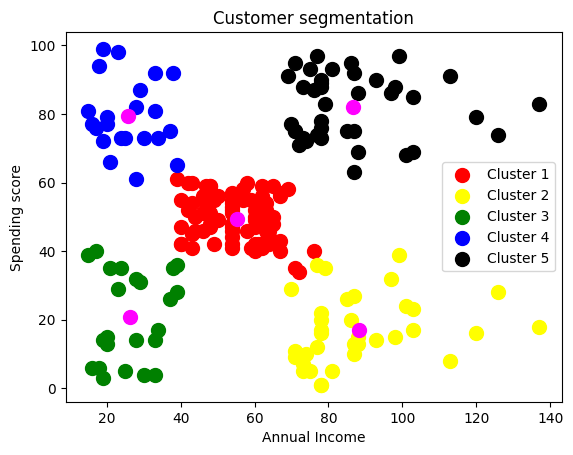

In [43]:
plt.scatter(X.iloc[y_means==0,0],X.iloc[y_means==0,1], s=100, c='red',label="Cluster 1")
plt.scatter(X.iloc[y_means==1,0],X.iloc[y_means==1,1], s=100, c='yellow',label="Cluster 2")
plt.scatter(X.iloc[y_means==2,0],X.iloc[y_means==2,1], s=100, c='green',label="Cluster 3")
plt.scatter(X.iloc[y_means==3,0],X.iloc[y_means==3,1], s=100, c='blue',label="Cluster 4")
plt.scatter(X.iloc[y_means==4,0],X.iloc[y_means==4,1], s=100, c='black',label="Cluster 5")
plt.scatter(k_means.cluster_centers_[:,0],k_means.cluster_centers_[:,1], s=100, c='magenta')
plt.xlabel("Annual Income")
plt.ylabel("Spending score")
plt.title("Customer segmentation")
plt.legend()
plt.show()

In [44]:
k_means.predict([[15, 39]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([2], dtype=int32)

## Save the model


In [45]:
import joblib

In [46]:
joblib.dump(k_means,"Customer_segmentation")

['Customer_segmentation']

In [47]:
model = joblib.load("Customer_segmentation")

In [48]:
model.predict([[15,39]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([2], dtype=int32)

## PREDICTION


In [49]:
from sklearn.cluster import KMeans
import joblib
import ipywidgets as widgets
from IPython.display import display

# Load the model
model = joblib.load("Customer_segmentation")

def predict_cluster(b):
    # Get values from input widgets
    income = float(income_input.value)
    spending_score = float(spending_input.value)

    # Make prediction using the loaded model
    prediction = model.predict([[income, spending_score]])

    # Update the result label
    result_label.value = f"Predicted Cluster: {prediction[0]}"

# Create input widgets
income_input = widgets.FloatText(description="Annual Income:")
spending_input = widgets.FloatText(description="Spending Score:")
predict_button = widgets.Button(description="Predict")
result_label = widgets.Label(value="Predicted Cluster: -")

# Assign function to button click event
predict_button.on_click(predict_cluster)

# Display widgets
display(income_input, spending_input, predict_button, result_label)


FloatText(value=0.0, description='Annual Income:')

FloatText(value=0.0, description='Spending Score:')

Button(description='Predict', style=ButtonStyle())

Label(value='Predicted Cluster: -')

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


# DBSCAN


In [50]:
from sklearn.cluster import DBSCAN

In [51]:
data = pd.read_csv('/content/Mall_Customers.csv')


In [52]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [53]:
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]


In [54]:
X

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


## MODEL TRAINING

In [55]:
dbscan = DBSCAN(eps=5, min_samples=5)  # You may need to adjust 'eps' and 'min_samples' based on your data
y_dbscan = dbscan.fit_predict(X)


In [56]:
y_dbscan

array([-1,  0, -1,  0, -1,  0, -1, -1, -1,  0, -1, -1, -1,  0, -1,  0, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1, -1,  2, -1,  4,  3,  2,  3,  2, -1,  2,  3,  4,
        3,  2,  3,  2,  3,  4, -1,  4,  3,  4, -1,  2, -1,  4, -1,  4, -1,
        2, -1,  4,  3,  2,  3,  2, -1,  4, -1,  4, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

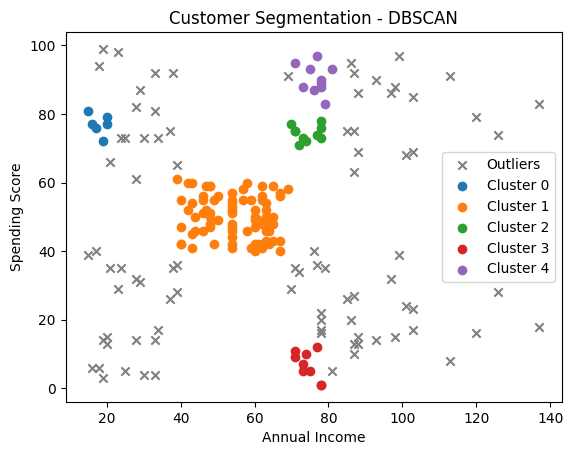

In [57]:
import numpy as np

# Assuming -1 represents outliers in DBSCAN
outliers = y_dbscan == -1

# Plotting outliers separately
plt.scatter(X.iloc[outliers, 0], X.iloc[outliers, 1], c='gray', marker='x', label='Outliers')

# Plotting other clusters
for cluster_label in np.unique(y_dbscan[y_dbscan != -1]):
    plt.scatter(X.iloc[y_dbscan == cluster_label, 0], X.iloc[y_dbscan == cluster_label, 1], label=f'Cluster {cluster_label}')

plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Customer Segmentation - DBSCAN')
plt.legend()
plt.show()


In [58]:
from sklearn.cluster import DBSCAN
import joblib

# Save the model and the labels
joblib.dump(dbscan, "dbscan_model.joblib")
np.save("dbscan_labels.npy", y_dbscan)

# Load the model and the labels
loaded_dbscan = joblib.load("dbscan_model.joblib")
loaded_labels = np.load("dbscan_labels.npy")

# You can now use 'loaded_dbscan' for predictions and 'loaded_labels' for the labels assigned during fitting.


## Prediction

In [59]:
def predict_dbscan(b):
  annual_income=float(income_input.value)
  spending_score=float(spending_input.value)

  # New point to predict
  new_point = np.array([[annual_income, spending_score]])

  # Combine the new point with the existing dataset
  combined_data = np.vstack([X.values, new_point])

  # Fit and predict using DBSCAN on the combined dataset
  y_combined_dbscan = dbscan.fit_predict(combined_data)

  # The cluster label for the new point
  predicted_cluster = y_combined_dbscan[-1]
  new_point_cluster_label.value = f"Predicted Cluster: {predicted_cluster}"


In [60]:
# Create input widgets
income_input = widgets.FloatText(description="Annual Income:")
spending_input = widgets.FloatText(description="Spending Score:")
predict_button = widgets.Button(description="Predict")
new_point_cluster_label = widgets.Label(value="Predicted Cluster: -")

# Assign function to button click event
predict_button.on_click(predict_dbscan)

# Display widgets
display(income_input, spending_input, predict_button,  new_point_cluster_label)

FloatText(value=0.0, description='Annual Income:')

FloatText(value=0.0, description='Spending Score:')

Button(description='Predict', style=ButtonStyle())

Label(value='Predicted Cluster: -')

In [61]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Assuming 'X' is your feature matrix and 'y_kmeans' is the cluster labels from K-means
y_kmeans = k_means.predict(X)

# Silhouette Score
silhouette_kmeans = silhouette_score(X, y_kmeans)

# Davies-Bouldin Index
davies_bouldin_kmeans = davies_bouldin_score(X, y_kmeans)

print("K-means Silhouette Score:", silhouette_kmeans)
print("K-means Davies-Bouldin Index:", davies_bouldin_kmeans)



K-means Silhouette Score: 0.553931997444648
K-means Davies-Bouldin Index: 0.5725628995597081


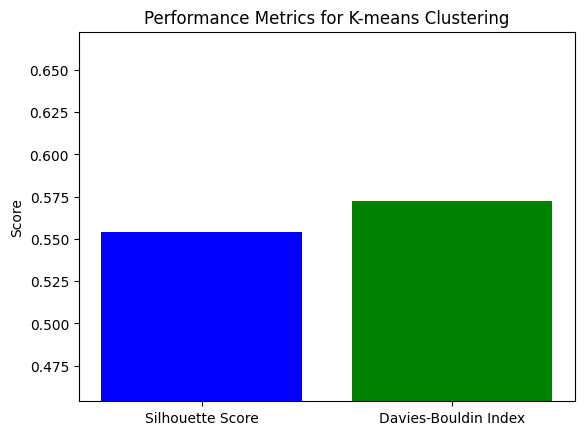

In [62]:
metrics = ['Silhouette Score', 'Davies-Bouldin Index']
values = [silhouette_kmeans, davies_bouldin_kmeans]

# Plotting the bar graph
plt.bar(metrics, values, color=['blue', 'green'])
plt.ylabel('Score')
plt.title('Performance Metrics for K-means Clustering')
plt.ylim(min(values) - 0.1, max(values) + 0.1)  # Adjust the y-axis limits for better visualization
plt.show()

In [63]:
# Assuming 'X' is your feature matrix and 'y_dbscan' is the cluster labels from DBSCAN
# y_dbscan = dbscan.fit_predict(X)

# Exclude noise/outliers (-1) from the calculation
silhouette_dbscan = silhouette_score(X, y_dbscan)

# Exclude noise/outliers (-1) from the calculation
davies_bouldin_dbscan = davies_bouldin_score(X, y_dbscan)

print("DBSCAN Silhouette Score:", silhouette_dbscan)
print("DBSCAN Davies-Bouldin Index:", davies_bouldin_dbscan)


DBSCAN Silhouette Score: 0.1135163893571667
DBSCAN Davies-Bouldin Index: 2.552071407323332


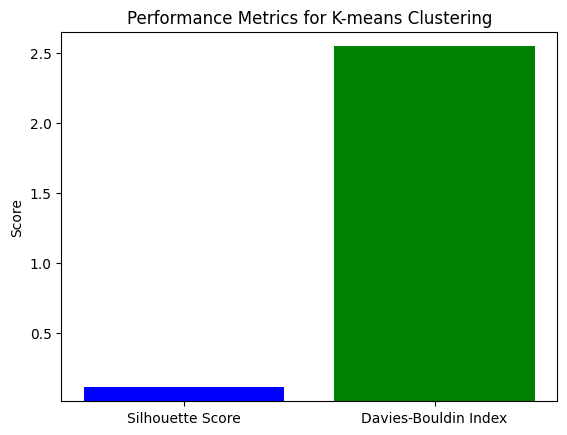

In [64]:
metrics = ['Silhouette Score', 'Davies-Bouldin Index']
values = [silhouette_dbscan, davies_bouldin_dbscan]

# Plotting the bar graph
plt.bar(metrics, values, color=['blue', 'green'])
plt.ylabel('Score')
plt.title('Performance Metrics for K-means Clustering')
plt.ylim(min(values) - 0.1, max(values) + 0.1)  # Adjust the y-axis limits for better visualization
plt.show()

# HDBSCAN

In [65]:
import numpy as np


import pandas as pd
import matplotlib.pyplot as plt

In [66]:
df = pd.read_csv('/content/Mall_Customers.csv')

In [67]:
X = df.iloc[:,[3,4]].values

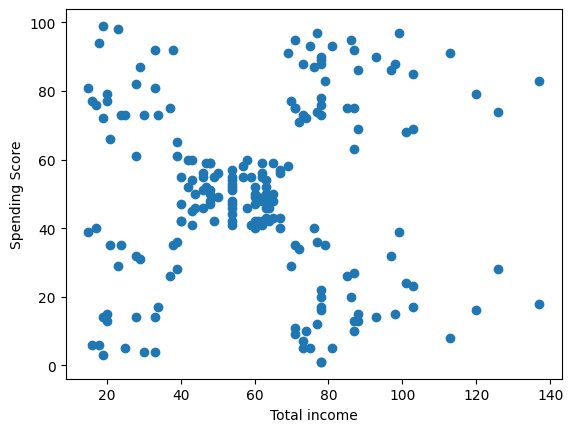

In [68]:
plt.scatter(X[...,0],X[...,1])
plt.xlabel("Total income")
plt.ylabel("Spending Score")
plt.show()

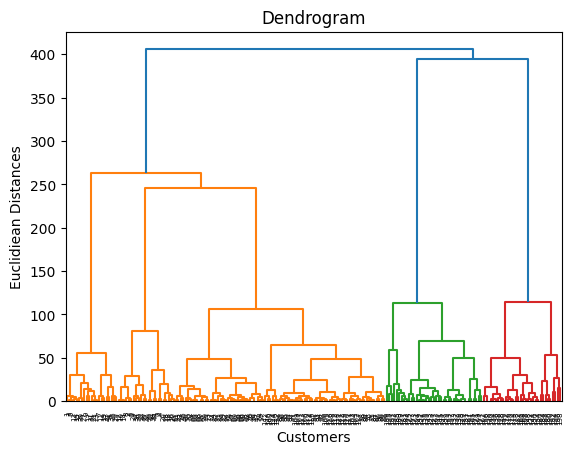

In [69]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X,method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidiean Distances')
plt.show()

In [93]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
Y_hc = hc.fit_predict(X)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [94]:
Y_hc

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

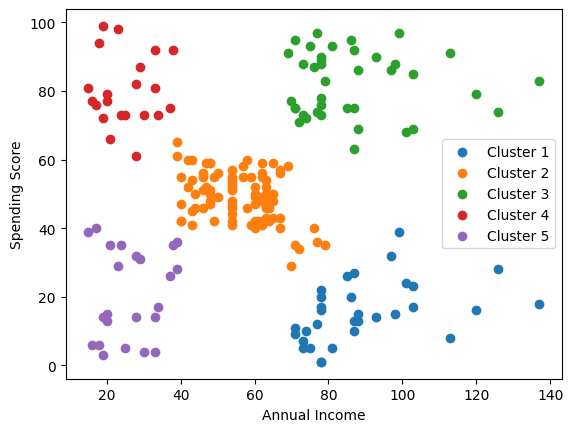

In [72]:
plt.scatter(X[Y_hc == 0,0],X[Y_hc == 0,1],label='Cluster 1')
plt.scatter(X[Y_hc == 1,0],X[Y_hc == 1,1],label='Cluster 2')
plt.scatter(X[Y_hc == 2,0],X[Y_hc == 2,1],label='Cluster 3')
plt.scatter(X[Y_hc == 3,0],X[Y_hc == 3,1],label='Cluster 4')
plt.scatter(X[Y_hc == 4,0],X[Y_hc == 4,1],label='Cluster 5')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

In [95]:
df['Target'] = Y_hc
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Target
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4
...,...,...,...,...,...,...
195,196,Female,35,120,79,2
196,197,Female,45,126,28,0
197,198,Male,32,126,74,2
198,199,Male,32,137,18,0


In [74]:
import joblib

In [75]:
joblib.dump(hc, "HDBSCAN")

['HDBSCAN']

In [76]:
import ipywidgets as widgets
from IPython.display import display

In [97]:
model = joblib.load("HDBSCAN")

In [99]:
from sklearn.cluster import AgglomerativeClustering
import numpy as np

def predict_cluster(b):
    income = float(income_input.value)
    spending_score = float(spending_input.value)

    # Check if there are at least two samples in the original dataset
    if X.shape[0] < 2:
        result_label.value = "Insufficient data for clustering."
        return

    # Concatenate the new point with the existing dataset
    combined_data = np.vstack([X, np.array([[income, spending_score]])])


    model.fit(combined_data)


    prediction = model.labels_[-1]

    result_label.value = f"Predicted Cluster: {prediction}"

income_input = widgets.FloatText(description="Annual Income:")
spending_input = widgets.FloatText(description="Spending Score")
predict_button = widgets.Button(description="Predict")
result_label = widgets.Label(value="Predicted Cluster: - ")

predict_button.on_click(predict_cluster)

display(income_input, spending_input, predict_button, result_label)


FloatText(value=0.0, description='Annual Income:')

FloatText(value=0.0, description='Spending Score')

Button(description='Predict', style=ButtonStyle())

Label(value='Predicted Cluster: - ')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [91]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Silhouette Score
silhouette_agg = silhouette_score(X, Y_hc)

# Davies-Bouldin Index
davies_bouldin_agg = davies_bouldin_score(X, Y_hc)

print("Hierarchical Clustering Silhouette Score:", silhouette_agg)
print("Hierarchical Clustering Davies-Bouldin Index:", davies_bouldin_agg)

Hierarchical Clustering Silhouette Score: 0.5529945955148897
Hierarchical Clustering Davies-Bouldin Index: 0.5782207452369454


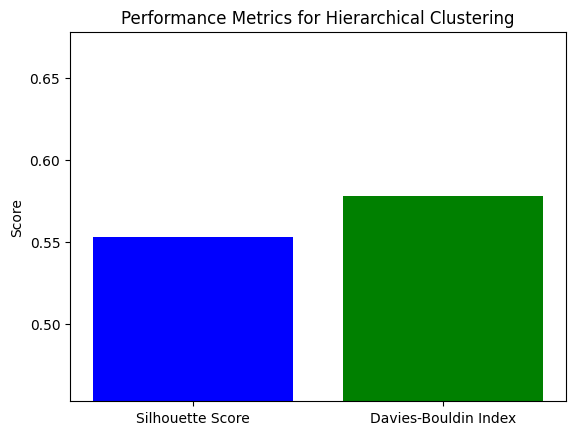

In [92]:
metrics_agg = ['Silhouette Score', 'Davies-Bouldin Index']
values_agg = [silhouette_agg, davies_bouldin_agg]

# Plotting the bar graph
plt.bar(metrics_agg, values_agg, color=['blue', 'green'])
plt.ylabel('Score')
plt.title('Performance Metrics for Hierarchical Clustering')
plt.ylim(min(values_agg) - 0.1, max(values_agg) + 0.1)  # Adjust the y-axis limits for better visualization
plt.show()